In [2]:
pip install pandas numpy matplotlib seaborn scikit-learn jupyter joblib plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Libraries imported successfully!
Dataset Shape: (1000, 9)

First 5 rows:
   student_id       name class  comprehension  attention  focus  retention  \
0           1  Student_1     C             52         89     69         82   
1           2  Student_2     A             80         67     47         72   
2           3  Student_3     C             89         59     84         74   
3           4  Student_4     C             86         86     54         57   
4           5  Student_5     A             85         98     88         94   

   engagement_time  assessment_score  
0               36                67  
1               51                63  
2              103                78  
3               82                78  
4              108                98  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   student

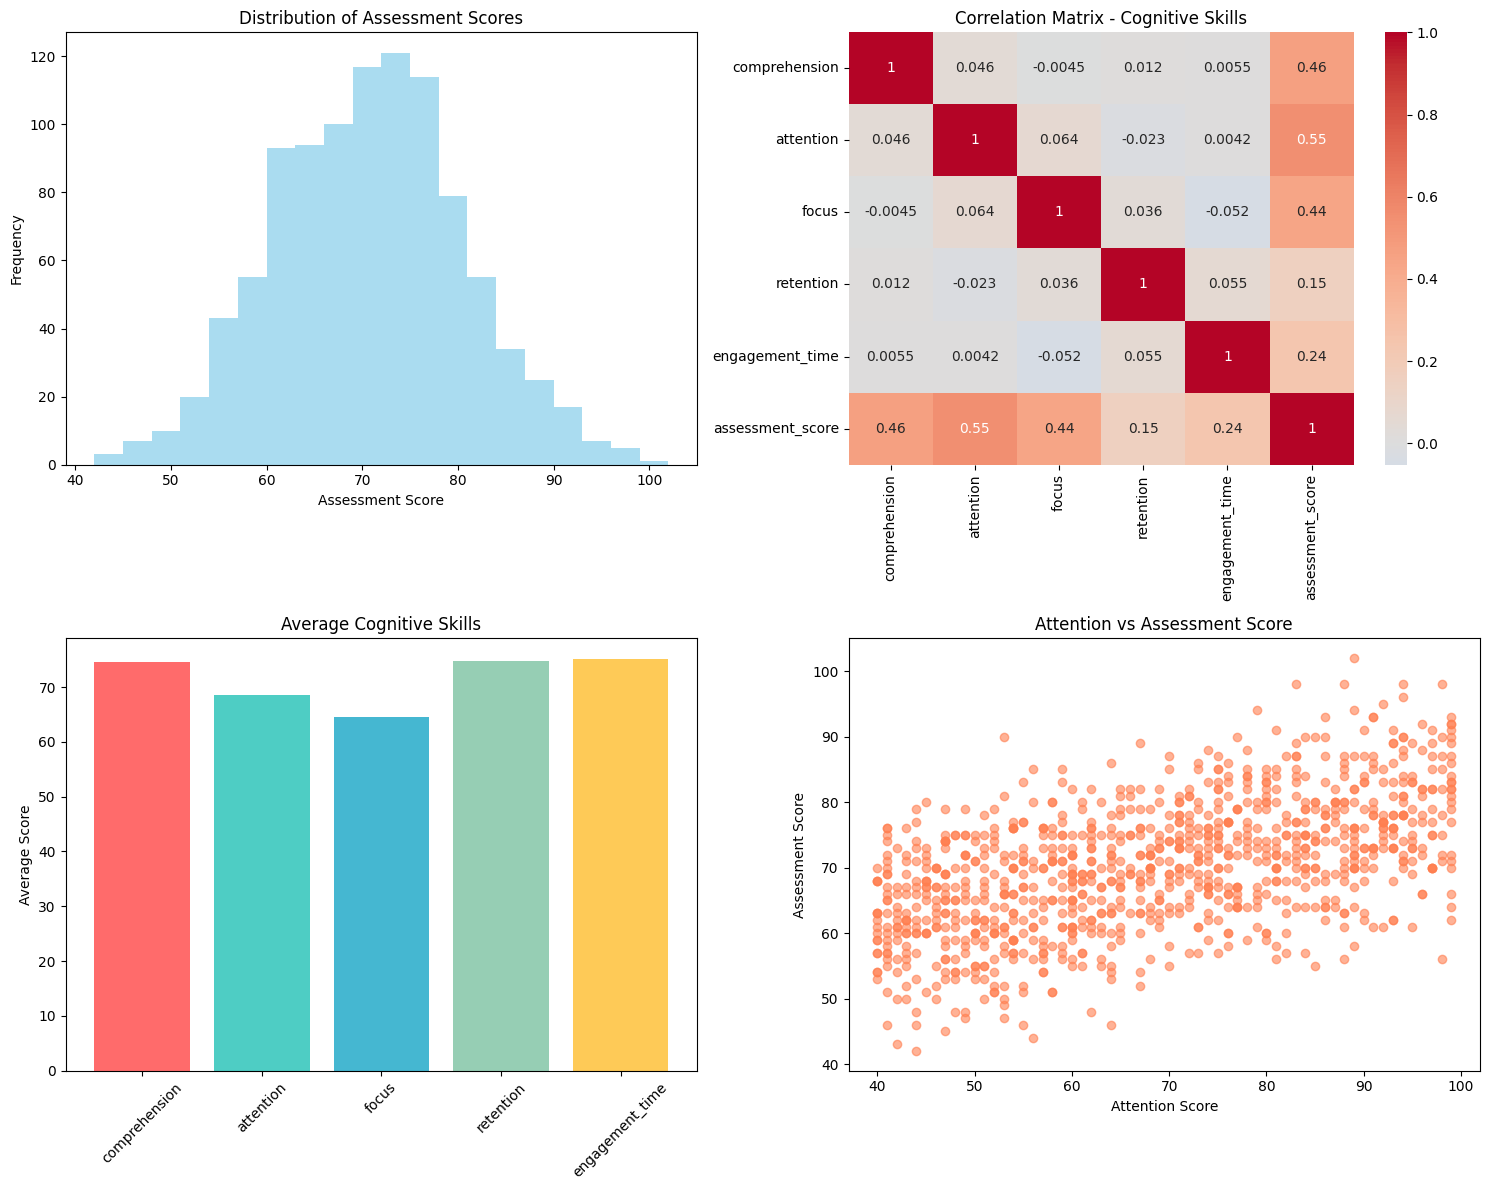


📊 KEY INSIGHTS:
--------------------------------------------------
• Strongest predictor: Attention (correlation: 0.549)
• Average assessment score: 70.23
• Score range: 42.0 - 102.0

🤖 MACHINE LEARNING MODEL RESULTS:
--------------------------------------------------
• Mean Absolute Error: 4.002
• Mean Squared Error: 24.357
• R² Score: 0.773

• Feature Importance (by coefficient):
  - Comprehension: 0.313
  - Attention: 0.287
  - Focus: 0.202
  - Engagement_time: 0.087
  - Retention: 0.085

✅ Model saved as 'models/trained_model.pkl'

🎯 STUDENT CLUSTERING RESULTS:
--------------------------------------------------
Cluster Profiles (Average Values):
         comprehension  attention  focus  retention  engagement_time  \
cluster                                                                
0                73.15      70.40  65.48      59.59            64.38   
1                60.87      64.36  63.55      83.56            81.68   
2                87.51      70.48  64.34      82.29  

<Figure size 1200x800 with 0 Axes>

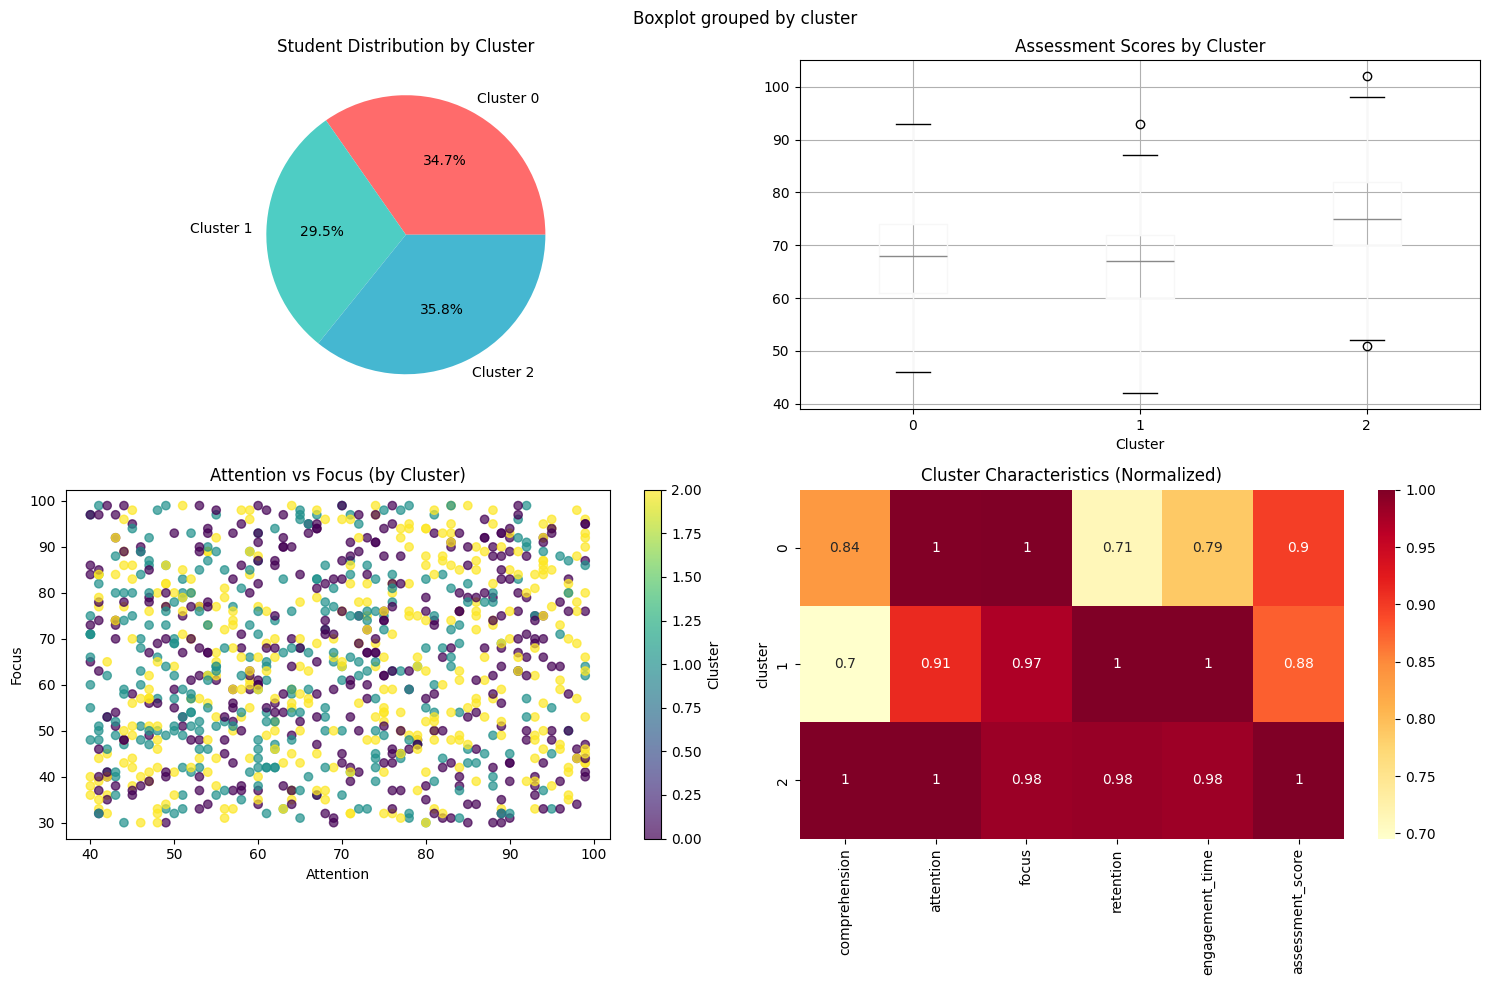


✅ Cluster model and scaler saved!

👥 LEARNING PERSONAS:
--------------------------------------------------

Developing Learners (cluster_0)
Description: Students showing potential with room for improvement
Characteristics: Moderate cognitive skills, Consistent engagement, Steady progress
Recommendations: Structured practice, Regular feedback, Skill-building exercises

Focused Performers (cluster_1)
Description: Students with strong focus but varied other skills
Characteristics: Good concentration, Task-oriented, Steady learners
Recommendations: Complex problem solving, Independent projects, Skill diversification

Support Needed (cluster_2)
Description: Students requiring additional support and attention
Characteristics: Need attention support, Benefit from guidance, Potential for growth
Recommendations: Extra support, Smaller groups, Frequent check-ins

✅ Data exported successfully!
File saved: 'processed_data/student_processed.json'

📋 PROJECT COMPLETION SUMMARY

✅ COMPLETED TASKS:
•

In [1]:
# Cell 1: Import Libraries and Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import json
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")

# Cell 2: Load and Explore Dataset
# Load the dataset
df = pd.read_csv('data/student_data.csv')

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nBasic Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

# Cell 3: Exploratory Data Analysis
# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Distribution of Assessment Scores
axes[0,0].hist(df['assessment_score'], bins=20, alpha=0.7, color='skyblue')
axes[0,0].set_title('Distribution of Assessment Scores')
axes[0,0].set_xlabel('Assessment Score')
axes[0,0].set_ylabel('Frequency')

# 2. Correlation Heatmap
cognitive_skills = ['comprehension', 'attention', 'focus', 'retention', 'engagement_time', 'assessment_score']
corr_matrix = df[cognitive_skills].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[0,1])
axes[0,1].set_title('Correlation Matrix - Cognitive Skills')

# 3. Average Cognitive Skills
skills_avg = df[['comprehension', 'attention', 'focus', 'retention', 'engagement_time']].mean()
axes[1,0].bar(skills_avg.index, skills_avg.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57'])
axes[1,0].set_title('Average Cognitive Skills')
axes[1,0].set_ylabel('Average Score')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Attention vs Assessment Score
axes[1,1].scatter(df['attention'], df['assessment_score'], alpha=0.6, color='coral')
axes[1,1].set_title('Attention vs Assessment Score')
axes[1,1].set_xlabel('Attention Score')
axes[1,1].set_ylabel('Assessment Score')

plt.tight_layout()
plt.show()

# Print key insights
print("\n📊 KEY INSIGHTS:")
print("-" * 50)
strongest_corr = corr_matrix['assessment_score'].drop('assessment_score').abs().idxmax()
strongest_corr_value = corr_matrix['assessment_score'][strongest_corr]
print(f"• Strongest predictor: {strongest_corr.capitalize()} (correlation: {strongest_corr_value:.3f})")
print(f"• Average assessment score: {df['assessment_score'].mean():.2f}")
print(f"• Score range: {df['assessment_score'].min():.1f} - {df['assessment_score'].max():.1f}")

# Cell 4: Machine Learning Model Training
# Prepare features and target
feature_columns = ['comprehension', 'attention', 'focus', 'retention', 'engagement_time']
X = df[feature_columns]
y = df['assessment_score']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n🤖 MACHINE LEARNING MODEL RESULTS:")
print("-" * 50)
print(f"• Mean Absolute Error: {mae:.3f}")
print(f"• Mean Squared Error: {mse:.3f}")
print(f"• R² Score: {r2:.3f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'coefficient': model.coef_,
    'abs_coefficient': np.abs(model.coef_)
}).sort_values('abs_coefficient', ascending=False)

print("\n• Feature Importance (by coefficient):")
for _, row in feature_importance.iterrows():
    print(f"  - {row['feature'].capitalize()}: {row['coefficient']:.3f}")

# Save the trained model
import os
os.makedirs('models', exist_ok=True)
joblib.dump(model, 'models/trained_model.pkl')
print("\n✅ Model saved as 'models/trained_model.pkl'")

# Cell 5: Student Clustering Analysis
# Prepare data for clustering
cluster_features = ['comprehension', 'attention', 'focus', 'retention', 'engagement_time']
X_cluster = df[cluster_features]

# Standardize the features
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_cluster_scaled)

# Add cluster labels to dataframe
df['cluster'] = cluster_labels

# Analyze clusters
print("\n🎯 STUDENT CLUSTERING RESULTS:")
print("-" * 50)

cluster_summary = df.groupby('cluster')[cluster_features + ['assessment_score']].mean()
print("Cluster Profiles (Average Values):")
print(cluster_summary.round(2))

# Count students in each cluster
cluster_counts = df['cluster'].value_counts().sort_index()
print(f"\nCluster Distribution:")
for cluster, count in cluster_counts.items():
    print(f"• Cluster {cluster}: {count} students ({count/len(df)*100:.1f}%)")

# Visualize clusters
plt.figure(figsize=(12, 8))

# Create subplots for cluster analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Cluster distribution
axes[0,0].pie(cluster_counts.values, labels=[f'Cluster {i}' for i in cluster_counts.index], 
              autopct='%1.1f%%', colors=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0,0].set_title('Student Distribution by Cluster')

# 2. Cluster vs Assessment Score
df.boxplot(column='assessment_score', by='cluster', ax=axes[0,1])
axes[0,1].set_title('Assessment Scores by Cluster')
axes[0,1].set_xlabel('Cluster')

# 3. Attention vs Focus colored by cluster
scatter = axes[1,0].scatter(df['attention'], df['focus'], c=df['cluster'], 
                           cmap='viridis', alpha=0.7)
axes[1,0].set_title('Attention vs Focus (by Cluster)')
axes[1,0].set_xlabel('Attention')
axes[1,0].set_ylabel('Focus')
plt.colorbar(scatter, ax=axes[1,0], label='Cluster')

# 4. Cluster characteristics heatmap
cluster_normalized = cluster_summary.div(cluster_summary.max())
sns.heatmap(cluster_normalized, annot=True, cmap='YlOrRd', ax=axes[1,1])
axes[1,1].set_title('Cluster Characteristics (Normalized)')

plt.tight_layout()
plt.show()

# Save cluster model and scaler
joblib.dump(kmeans, 'models/cluster_model.pkl')
joblib.dump(scaler, 'models/scaler.pkl')
print("\n✅ Cluster model and scaler saved!")

# Cell 6: Generate Learning Personas
# Define cluster personas based on analysis
def get_cluster_persona(cluster_id, cluster_data):
    avg_score = cluster_data['assessment_score']
    
    if cluster_id == 0:
        if avg_score > df['assessment_score'].mean():
            return {
                'name': 'High Achievers',
                'description': 'Students with excellent cognitive skills and high performance',
                'characteristics': ['Strong attention span', 'High comprehension', 'Excellent focus'],
                'recommendations': ['Advanced challenges', 'Leadership opportunities', 'Peer mentoring']
            }
        else:
            return {
                'name': 'Developing Learners',
                'description': 'Students showing potential with room for improvement',
                'characteristics': ['Moderate cognitive skills', 'Consistent engagement', 'Steady progress'],
                'recommendations': ['Structured practice', 'Regular feedback', 'Skill-building exercises']
            }
    elif cluster_id == 1:
        return {
            'name': 'Focused Performers',
            'description': 'Students with strong focus but varied other skills',
            'characteristics': ['Good concentration', 'Task-oriented', 'Steady learners'],
            'recommendations': ['Complex problem solving', 'Independent projects', 'Skill diversification']
        }
    else:
        return {
            'name': 'Support Needed',
            'description': 'Students requiring additional support and attention',
            'characteristics': ['Need attention support', 'Benefit from guidance', 'Potential for growth'],
            'recommendations': ['Extra support', 'Smaller groups', 'Frequent check-ins']
        }

personas = {}
for cluster_id in range(3):
    cluster_data = cluster_summary.loc[cluster_id]
    personas[f'cluster_{cluster_id}'] = get_cluster_persona(cluster_id, cluster_data)

print("\n👥 LEARNING PERSONAS:")
print("-" * 50)
for cluster_id, persona in personas.items():
    print(f"\n{persona['name']} ({cluster_id})")
    print(f"Description: {persona['description']}")
    print("Characteristics:", ", ".join(persona['characteristics']))
    print("Recommendations:", ", ".join(persona['recommendations']))

# Cell 7: Export Data for Frontend
# Create comprehensive data export
export_data = {
    'students': df.to_dict('records'),
    'summary_stats': {
        'total_students': len(df),
        'average_score': float(df['assessment_score'].mean()),
        'score_std': float(df['assessment_score'].std()),
        'min_score': float(df['assessment_score'].min()),
        'max_score': float(df['assessment_score'].max())
    },
    'correlations': corr_matrix.to_dict(),
    'cluster_summary': cluster_summary.to_dict(),
    'cluster_counts': cluster_counts.to_dict(),
    'personas': personas,
    'feature_importance': feature_importance.to_dict('records'),
    'model_metrics': {
        'mae': float(mae),
        'mse': float(mse),
        'r2_score': float(r2)
    }
}

# Save processed data
os.makedirs('processed_data', exist_ok=True)
with open('processed_data/student_processed.json', 'w') as f:
    json.dump(export_data, f, indent=2)

print("\n✅ Data exported successfully!")
print("File saved: 'processed_data/student_processed.json'")

# Cell 8: Final Summary
print("\n" + "="*60)
print("📋 PROJECT COMPLETION SUMMARY")
print("="*60)
print("\n✅ COMPLETED TASKS:")
print("• ✓ Data analysis and visualization")
print("• ✓ Machine learning model trained and saved")
print("• ✓ Student clustering completed")
print("• ✓ Learning personas generated")
print("• ✓ Data exported for frontend")

print(f"\n📊 KEY FINDINGS:")
print(f"• Best predictor: {strongest_corr}")
print(f"• Model accuracy (R²): {r2:.3f}")
print(f"• {len(set(cluster_labels))} distinct learning groups identified")

print(f"\n📁 FILES GENERATED:")
print("• models/trained_model.pkl")
print("• models/cluster_model.pkl") 
print("• models/scaler.pkl")
print("• processed_data/student_processed.json")

print("\n🚀 NEXT STEP: Build the Next.js frontend!")